In [3]:
from prova import Simulation

First, we run the simulation by shuffling some cards and counting at which position we find the first ace.
We see that the answer matches very closely the analytical one we displayed in the .pdf file

In [4]:
sim = Simulation()


"""
Define here the statistical parameters
"""
CONFIDENCE = 0.95
SAMPLES = 100000

observations, sequence_aces = sim.get_confidence_interval(CONFIDENCE, SAMPLES)


The average number of cards required to produce the first ace is:  10.62273
The 95.0 % confidence interval for the average number of cards required to produce the first ace is: [ 10.57151998538989 10.673940014610112 ]


Moreover, since we are shuffling the deck randomly and in a way that we don't make any preference regarding the suits, we don't expect any unbalance in the distribution of the first aces picked with regards to their suit. 
We plot it to do a visual check.

(array([25013.,     0.,     0., 25119.,     0.,     0., 24911.,     0.,
            0., 24957.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

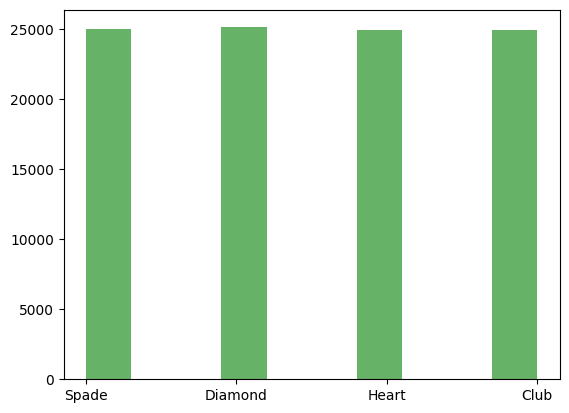

In [6]:
import matplotlib.pyplot as plt
plt.hist(sequence_aces, bins=10, alpha=0.6, color='g')

We ask ourservels, now, an additional question. 
Suppose you are playing the following game: you are asked to make a bet on after which number of turns the first ace will be revealed. 

To answer this question, one should be able to have an intuition about the mode of the distribution that describes the number of turns to make before discovering an ace. 
The first guess, following the computation of the expected value would be to say 10.6, but not all the distributions are symmetric! 
Indeed, as we computed explicitely in the .pdf file, rounds after round the probability of turning an ace at the following round decreases. 
In the next block of code, you can also see that this property we proved in the .pdf file holds when simulating the data.
Here you can look at a vizualization of this phenomena.

Was this surprising also for you?

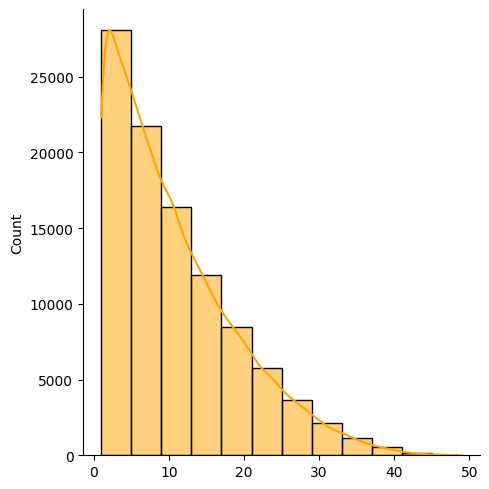

In [8]:
import seaborn as sns
sns.displot(observations, kde=True, 
             bins=int(12), color = 'orange')

Next, for the sake of completeness, we go back to the first question and we also compute the result we can find by analytically computing the expected value, using a recursive formula.

In [9]:
from prova import AnalyticalComputation

In [11]:
sol = AnalyticalComputation()
result, prob, cumulative = sol.expected_value()
print("Average number of card to be turned is: ", sol.expected_value()[0])
sol.check_sum()

Average number of card to be turned is:  10.600000000000003


Next, we verify that the closed formula we found to show that the probability of seeing the first ace at round i is decreasing with i growing, is actually confirmed by the simulation.

In [13]:
ok = []
for i in range(2, len(prob)):
    if abs(prob[i] - prob[i-1]*((49-(i-1))/(52-(i-1)))) < 1e-5:
        ok.append("ok")
assert len(ok) == len(prob)-2, "The closed probability formula is wrong"
print(len(ok), len(prob)-2)

48 48
